In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize':(20, 10)})
#(11.7,8.27)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_json('real_experiences_m_ch.jsonl', lines=True)

In [3]:
df.head()

,episode_index,shift_start,shift_end,order_timestamp,routes,route_update,revenue
0,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T15:59:55,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,0.75
1,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:53:07,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,1.75
2,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:56:55,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,2.75
3,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:08,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,3.75
4,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:14,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,4.25


# Episode index 1

Visualize order timestamp and revenue for episode index one.

In [4]:
episode_one = df.loc[df.episode_index == 1]

In [5]:
episode_one.head()

,episode_index,shift_start,shift_end,order_timestamp,routes,route_update,revenue
0,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T15:59:55,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,0.75
1,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:53:07,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,1.75
2,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:56:55,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,2.75
3,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:08,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,3.75
4,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:14,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,4.25


In [6]:
episode_one.shift_start.nunique()

1

In [7]:
episode_one.shift_end.nunique()

1

All entries for episode_index one regarding shift start and end is the same. Order timestamp and revenue increments suggests those are variables to explore further.

In [8]:
from datetime import datetime

time = datetime.strptime(episode_one.order_timestamp[0], "%Y-%m-%dT%H:%M:%S")

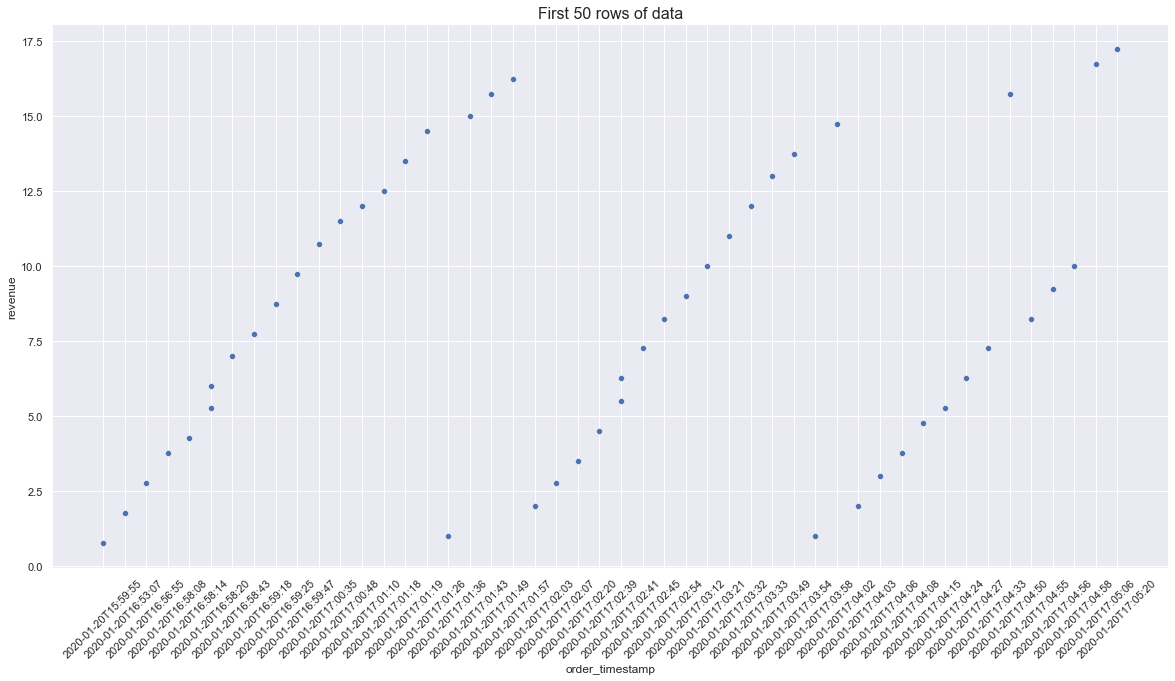

In [9]:
sns.scatterplot(data=episode_one.head(50), x='order_timestamp', y='revenue')
plt.xticks(rotation = 45)
plt.title("First 50 rows of data", fontsize=16)
plt.show()

We can notice that the are a few breaking points for revenue, this suggests it is depended on other information.

**Hypothesis**: dependency on vehicle-id

Extracting vehicle_id from route_update column for every row.

In [10]:
vehicle_ids = []
for row in range(len(episode_one)):
    vehicle_ids.append(episode_one.route_update.values[row]['vehicle_id'])

In [11]:
episode_one['vehicle_id'] = vehicle_ids

After creating a new row for vehicles_id, let's see a preview of the dataset.

In [12]:
episode_one.head()

,episode_index,shift_start,shift_end,order_timestamp,routes,route_update,revenue,vehicle_id
0,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T15:59:55,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,0.75,f520b0fa-ac0a-458b-9c44-e3d8a3aa5d13
1,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:53:07,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,1.75,f520b0fa-ac0a-458b-9c44-e3d8a3aa5d13
2,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:56:55,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,2.75,f520b0fa-ac0a-458b-9c44-e3d8a3aa5d13
3,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:08,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,3.75,f520b0fa-ac0a-458b-9c44-e3d8a3aa5d13
4,1,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:14,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,4.25,f520b0fa-ac0a-458b-9c44-e3d8a3aa5d13


Plotting scatterplot but this time vehicle_id will be used as seperator.

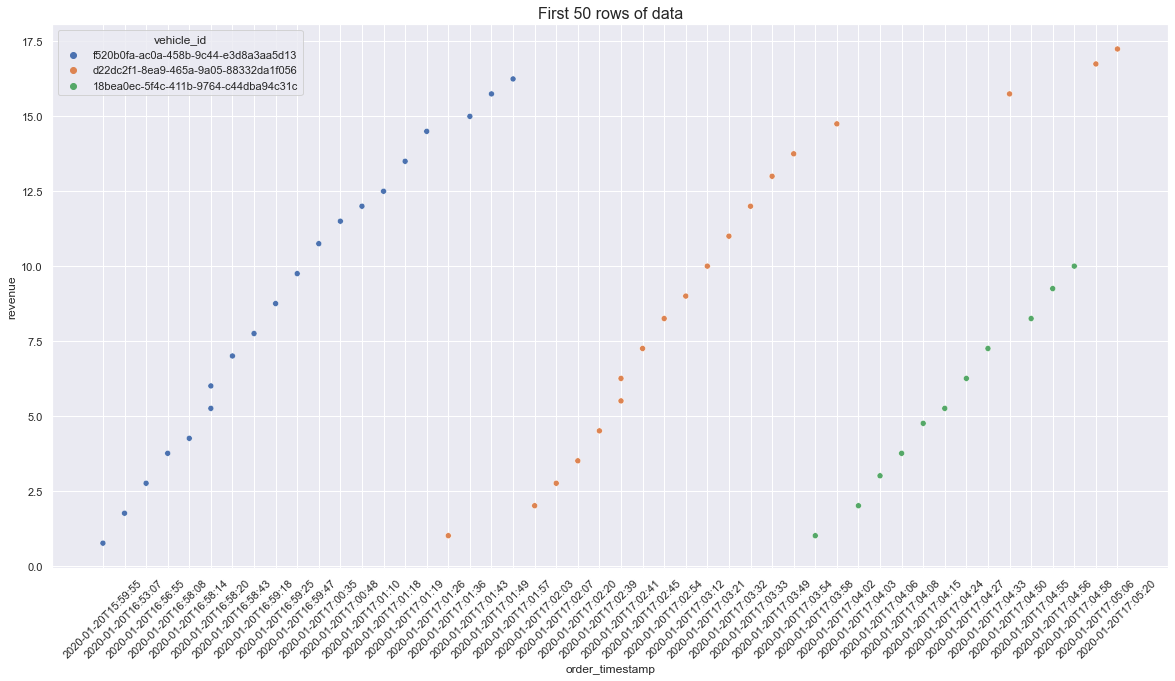

In [13]:
sns.scatterplot(data=episode_one.head(50), x='order_timestamp', y='revenue', hue='vehicle_id')
plt.xticks(rotation = 45)
plt.title("First 50 rows of data", fontsize=16)
plt.show()

How many of unique vehicles are present in the whole dataset?

In [14]:
uniques = []
for episode in range(df.episode_index.nunique()):
    episode_index = df.loc[df.episode_index == episode]
    for i in range(len(episode_index)):
        id = episode_index.route_update.values[i]['vehicle_id']
        if id not in uniques:
            uniques.append(id)

In [15]:
uniques

['f520b0fa-ac0a-458b-9c44-e3d8a3aa5d13',
 'd22dc2f1-8ea9-465a-9a05-88332da1f056',
 '18bea0ec-5f4c-411b-9764-c44dba94c31c']

For further EDA, order_timestamp will be simplified to only represent hour and minutes (i.e. 16:30) thus making plot for each vehicle_id more representable.

In [16]:
time_df = pd.to_datetime(episode_one.order_timestamp, infer_datetime_format=True)

In [17]:
episode_one['order_time'] = time_df.apply(lambda x: "{:d}:{:02d}".format(x.hour, x.minute))

In [18]:
after_shift_orders = episode_one.loc[(episode_one.order_time >= '20:00') & (episode_one.order_time <= '23:59')]

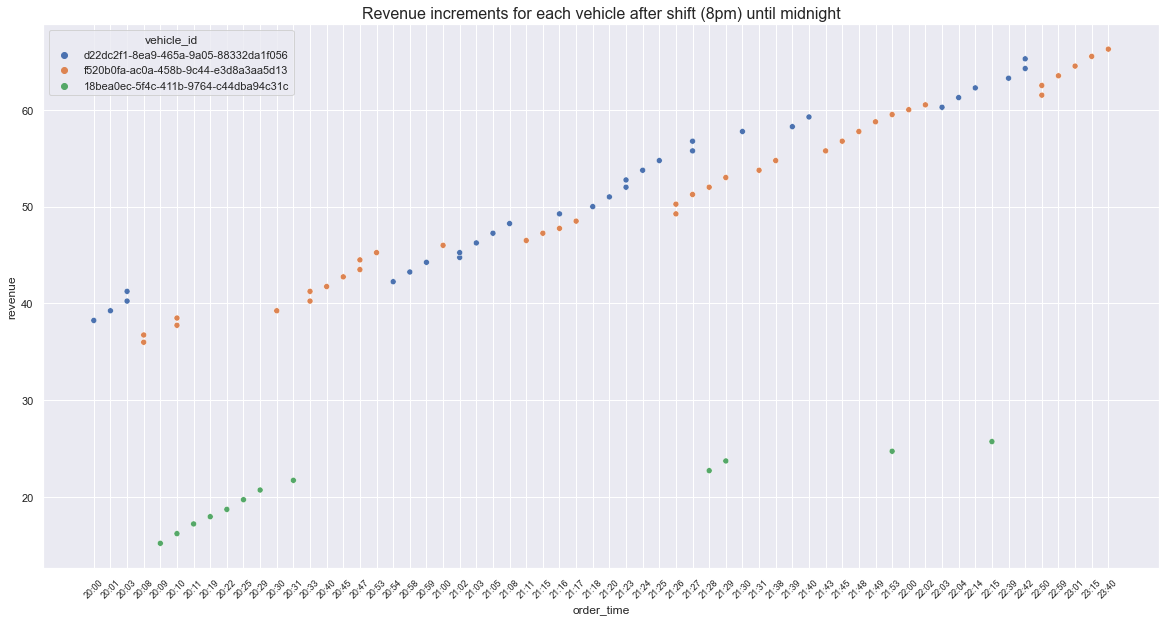

In [19]:
sns.scatterplot(data=after_shift_orders, x='order_time', y='revenue', hue='vehicle_id')
plt.xticks(rotation=45, fontsize=9)
plt.title("Revenue increments for each vehicle after shift (8pm) until midnight", fontsize=16)
plt.show()

Why does revenue increase even after shift? Does this mean drops are still made after shift hours as overtime?

Let's see what happens to order which come after 00:00

In [20]:
episode_one['order_hour'] = pd.to_datetime(episode_one.order_time, format='%H:%M').dt.hour
order_after_midnight = episode_one.loc[(episode_one.order_hour > 0) & (episode_one.order_hour < 8)]

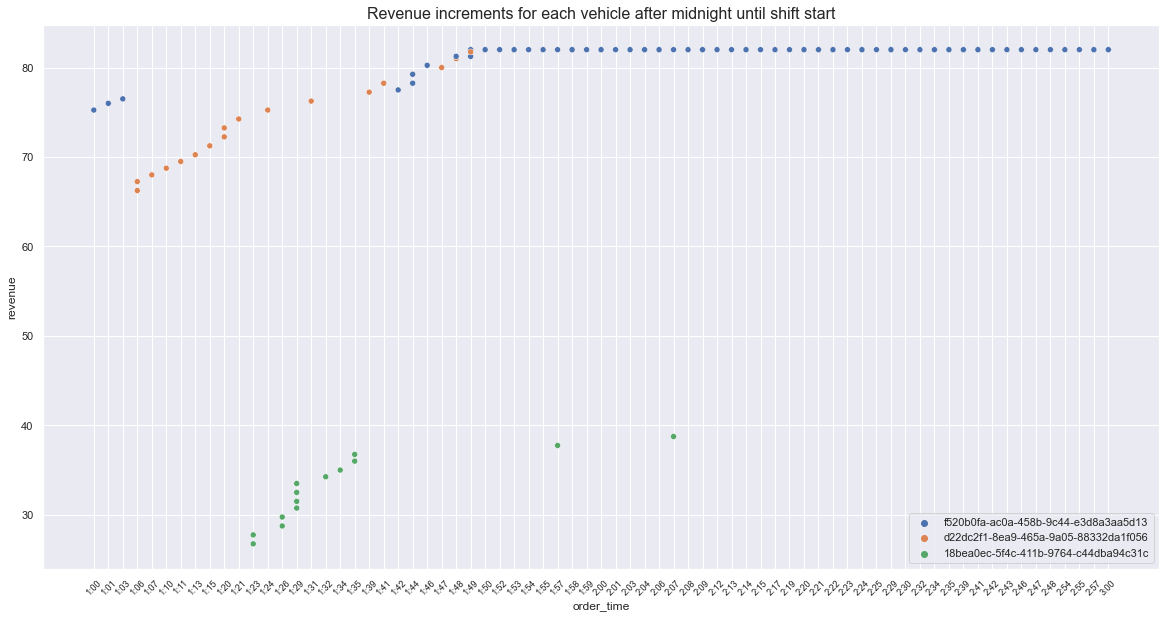

In [21]:
sns.scatterplot(data=order_after_midnight, x='order_time', y='revenue', hue='vehicle_id')
plt.xticks(rotation=45, fontsize=9)
plt.title("Revenue increments for each vehicle after midnight until shift start", fontsize=16)
plt.legend(loc=4)
plt.show()

Why new orders coming around 2am show no incremental revenue increase for 'blue' vehicle?

Each vehicle plots

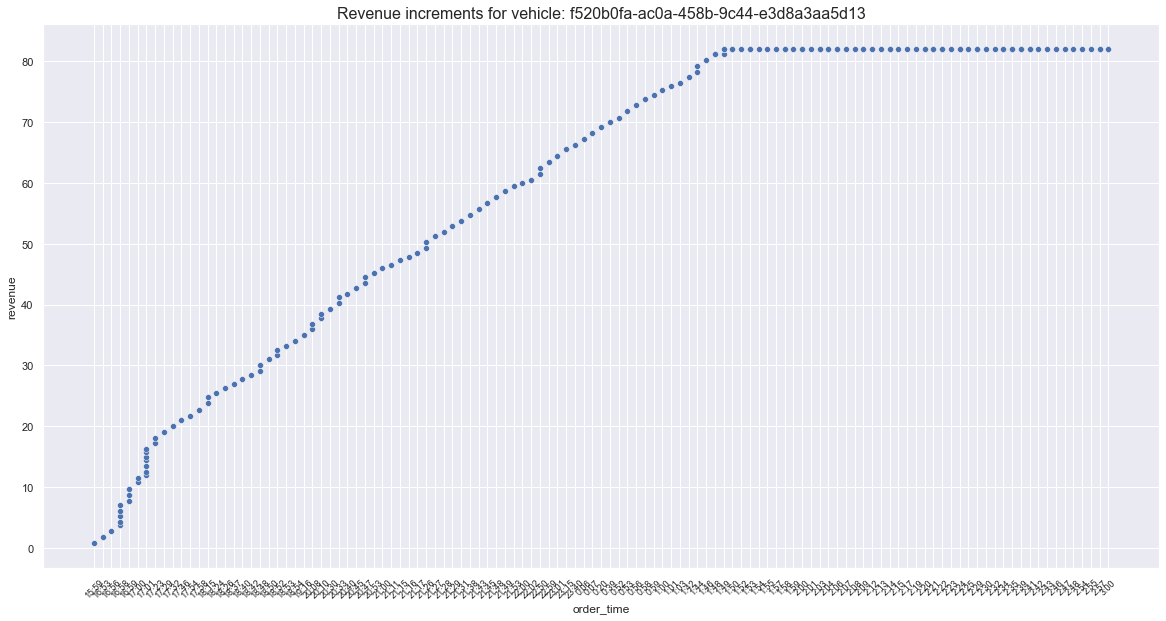

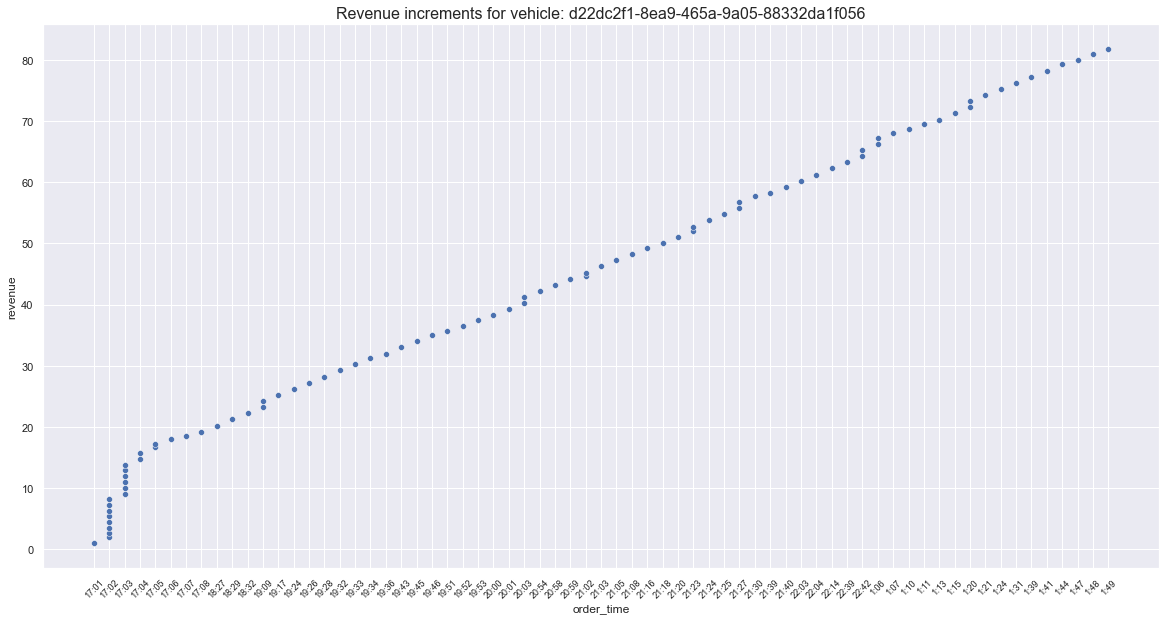

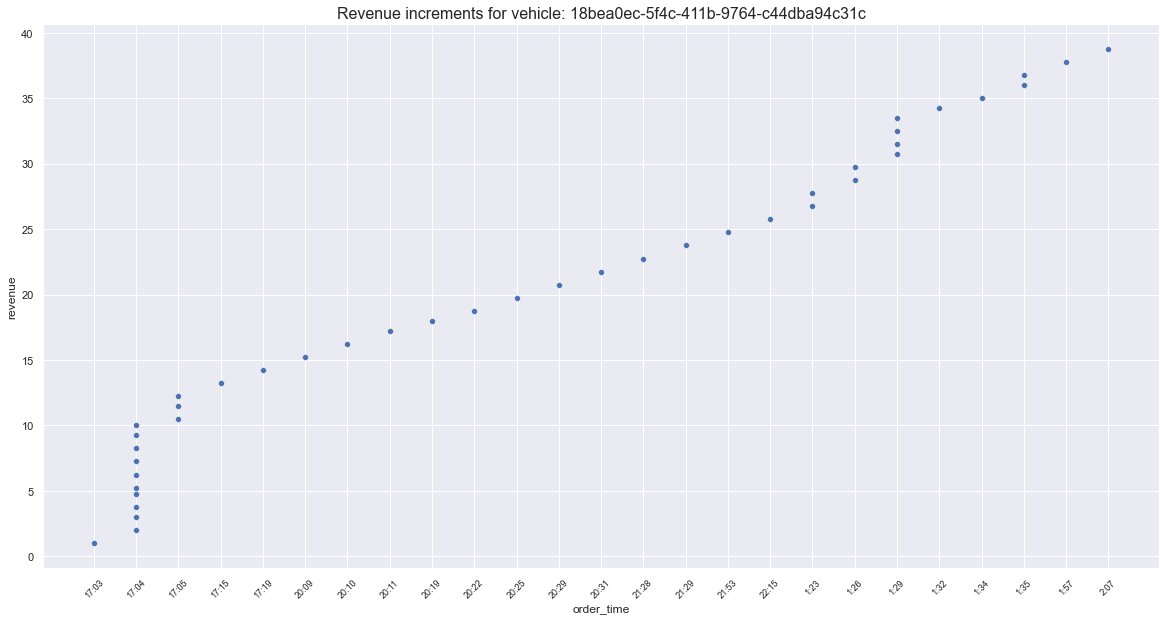

In [22]:
for vehicle_id in uniques:
    each_vehicle = episode_one.loc[episode_one.vehicle_id == vehicle_id]
    sns.scatterplot(data=each_vehicle, x='order_time', y='revenue')
    plt.xticks(rotation=45, fontsize=9)
    plt.title(f"Revenue increments for vehicle: {vehicle_id}", fontsize=16)
    plt.show()

It is clear that in the episode 1 most of the orders arrive between 16:00 and 03:00 (next day). 

Quick preview of other episode index suggests similar order time range, revenue, and we figure before that 3 vehicle_ids are the repetitive in all 20 episode indices. Therefore, EDA with respect to order time and revenues will not differentiate significantly.

# Route

Each route comes a list of all 3 vehicle for every row.

Source for visualization of the JSON tree http://jsonviewer.stack.hu/

Visualization below represents first row of episode index 1.

![Route schema](https://i.imgur.com/jtyVoF2.png)

## Route update

![Route_update schema](https://i.imgur.com/ph3lBMH.jpg)

P.S. Route update can also have loaded drops! Check episode_one.route_update.values[150]

![Route update 150 row](https://i.imgur.com/24liTTE.jpg)

**Comparing both routes and route_update for each vehicle I have noticed that route_update is already incorporated in loaded_drops for route**

Next, I will check what is the case when route_update contains loaded_drops as well.

When route_update contains non-empty loaded and unloaded drops, they are the same as routes loaded and unloaded drops. However, I have noticed that routes contain the whole fleet, therefore, other vehicles have mulptile loaded and unloaded drops too.

In [23]:
# episode_one.iloc[150:151, :].routes.values[0]

In [24]:
# episode_one.iloc[150:151, :].route_update.values[0]

In [25]:
df.loc[df.episode_index ==2 ]

,episode_index,shift_start,shift_end,order_timestamp,routes,route_update,revenue
300,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:54:34,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,0.75
301,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:57:54,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,1.75
302,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:57:58,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,2.75
303,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:07,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,3.75
304,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-20T16:58:49,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,4.25
...,...,...,...,...,...,...,...
595,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-21T03:00:00,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,80.50
596,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-21T03:00:00,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,80.50
597,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-21T03:00:00,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,80.50
598,2,2020-01-20T08:00:00,2020-01-20T20:00:00,2020-01-21T03:00:00,[{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a...,{'vehicle_id': 'f520b0fa-ac0a-458b-9c44-e3d8a3...,80.50
